<a href="https://colab.research.google.com/github/IBM-EPBL/IBM-Project-24971-1659951514/blob/master/Image%20PreProcessing/Image_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#** IMAGE PREPROCESSING**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the library

In [3]:
import numpy as np#used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A layer consists of a tensor-in tensor-out computation function
#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import Dense,Flatten
#Faltten-used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout #Convolutional layer
#MaxPooling2D-for downsampling the image
from keras.preprocessing.image import ImageDataGenerator

Arguments for ImageDataGenerator class

In [5]:
#setting parameter for Image Data agumentation to the training data
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
#Image Data agumentation to the testing data
test_datagen=ImageDataGenerator(rescale=1./255)

Applying ImageDataGenerator functionality to trainset and testset

In [8]:
#performing data agumentation to train data
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/content/TRAIN_SET',target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')
#performing data agumentation to test data
x_test = test_datagen.flow_from_directory(r'/content/drive/MyDrive/content/TEST_SET',target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse') 

Found 2626 images belonging to 1 classes.
Found 1055 images belonging to 1 classes.


In [12]:
# !pip install opencv.python

In [13]:
import cv2

In [67]:
#imread is used to read the image
img = cv2.imread("/content/drive/MyDrive/content/TEST_SET/TEST_SET/BANANA/r2_6_100.jpg")

In [68]:
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [69]:
img.ndim

3

In [70]:
type(img)

numpy.ndarray

In [71]:
img.shape

(100, 100, 3)

In [74]:
#flag 1 means color image
img_flag = cv2.imread("/content/drive/MyDrive/content/TEST_SET/TEST_SET/BANANA/r2_6_100.jpg")

In [75]:
img_flag

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [76]:
import matplotlib.pyplot as plt

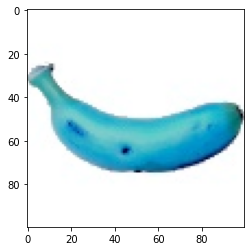

In [77]:
plt.imshow(img)

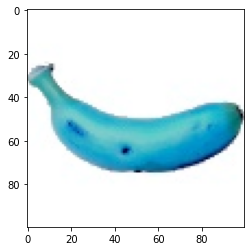

In [78]:
plt.imshow(img_flag)

In [79]:
#resize the image
resized_img = cv2.resize(img,(100,100))

In [80]:
resized_img.shape

(100, 100, 3)

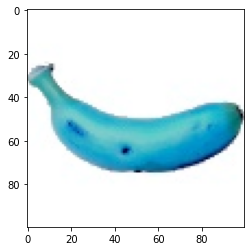

In [81]:
plt.imshow(resized_img)

In [82]:
cv_img = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)

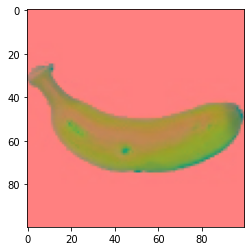

In [83]:
plt.imshow(cv_img)

In [84]:
cv_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

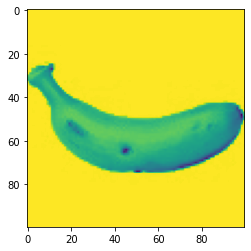

In [85]:
plt.imshow(cv_img)

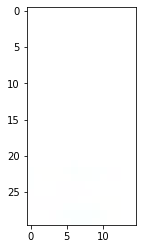

In [93]:
roi_img = img[5:28,5:15]
plt.imshow(roi_img)
roi_img = img[10:40,35:50]
plt.imshow(roi_img)

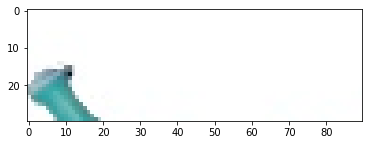

In [91]:
roi_img = img[10:40,0:90]
plt.imshow(roi_img)

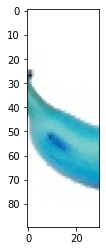

In [94]:
roi_img = img[0:90,10:40]
plt.imshow(roi_img)


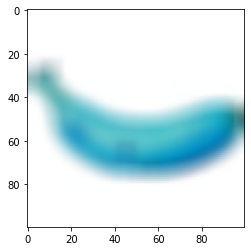

In [95]:
# averaging
# cv2.blur() or cv2.boxFilter
img_bl = cv2.blur(img,(10,10))
plt.imshow(img_bl)

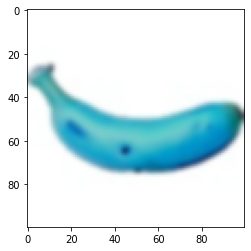

In [96]:
#gaussian blur
img_gbl = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(img_gbl)

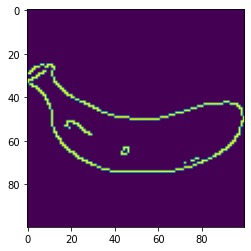

In [97]:
img_edge = cv2.Canny(img,230,350)
plt.imshow(img_edge)

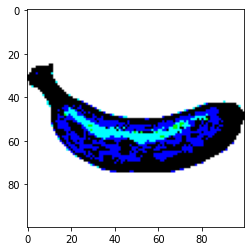

In [98]:
#binary
#src -- image
#thresh
#max_value
#type -- type of thersholding
#cv2.THRESH_BINARY -- Binary Thersholding
thresh, thresh_img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY) #img
plt.imshow(thresh_img)

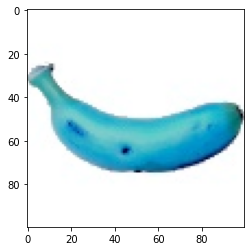

In [99]:
#circle 
#cv2.circle(image,(center coordinates),radius,(color), thickness)
circle = cv2.circle(img,(300,200),60,(255,0,0),5)
plt.imshow(img)

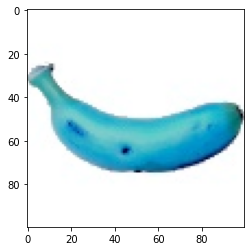

In [100]:
#rectangle
#cv2.rectangle(img,(start coord),(end coord),color,thickness)
rectangle = cv2.rectangle(img,(200,100),(400,300),(0,0,255),10)
plt.imshow(img)

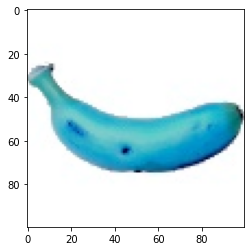

In [101]:
#line
#cv2.line(img,(start coord),(end coord),color,thickness)

line = cv2.line(img,(200,100),(400,300),(0,255,0),3)
plt.imshow(img)

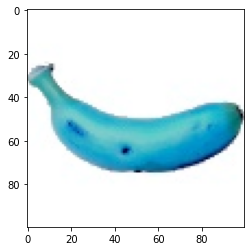

In [102]:
#creating or writing text an image
#cv2.putText(img,text,(coord),fontstyle,fontscale,color,thickness)
text = cv2.putText(img,"Opencv",(200,50),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),5)
plt.imshow(img)